# Dataset

In [1]:
import pandas as pd
df = pd.read_csv('customer_segmentation.csv')
df.dropna(inplace=True)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,D


# Preprocesamiento

In [2]:
from sklearn.preprocessing import OrdinalEncoder
columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']
enc = OrdinalEncoder()
df_enc = enc.fit_transform(df[columns])
for (index, column) in enumerate(columns):
  df[column] = df_enc[:, index]

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,0.0,1.0,36,1.0,2.0,0.0,2.0,1.0,5.0,B
1,458994,1.0,1.0,37,1.0,5.0,8.0,0.0,4.0,5.0,A
3,459000,1.0,1.0,59,0.0,4.0,11.0,1.0,2.0,5.0,B
5,459003,1.0,1.0,47,1.0,1.0,0.0,1.0,5.0,3.0,C
6,459005,1.0,1.0,61,1.0,1.0,5.0,2.0,3.0,5.0,D


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['Segmentation'])

X_columns = [x for x in list(df.columns) if x not in ['ID', 'Segmentation']]
X = df[X_columns]

print(X.shape, y.shape)

(8819, 9) (8819,)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.10821727,  0.83111925, -0.45341306, ...,  0.75632255,
        -1.19880222,  0.58729472],
       [ 0.90235013,  0.83111925, -0.3931016 , ..., -1.59351313,
         0.75564136,  0.58729472],
       [ 0.90235013,  0.83111925,  0.93375051, ..., -0.41859529,
        -0.54732103,  0.58729472],
       ...,
       [-1.10821727, -1.20319678, -0.63434743, ...,  0.75632255,
        -1.19880222,  0.58729472],
       [-1.10821727, -1.20319678, -0.99621619, ...,  0.75632255,
         0.75564136,  0.58729472],
       [ 0.90235013,  0.83111925, -0.3931016 , ..., -1.59351313,
         0.10416016, -0.83736547]])

# Entrenar un algoritmo de machine learning

In [6]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7055, 9) (1764, 9) (7055,) (1764,)


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [21]:
cls = GradientBoostingClassifier(random_state=0)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.49036281179138325


In [20]:
from sklearn.model_selection import GridSearchCV

In [22]:
cls = GradientBoostingClassifier(random_state=0)

In [23]:
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [75, 100, 125],
    'max_depth': [1, 3, 5]
}

cv = GridSearchCV(cls, params, scoring='accuracy', verbose=3)

In [24]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=75;, score=0.442 total time=   1.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=75;, score=0.444 total time=   0.8s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=75;, score=0.430 total time=   0.8s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=75;, score=0.436 total time=   0.8s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=75;, score=0.432 total time=   1.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.449 total time=   1.2s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.427 total time=   1.5s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.425 total time=   1.3s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.437 total time=   1.1s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.441 to

GridSearchCV(estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [75, 100, 125]},
             scoring='accuracy', verbose=3)

In [25]:
cv.best_score_

0.48688873139617295

In [27]:
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 75}

In [28]:
y_pred = cv.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.4937641723356009


In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

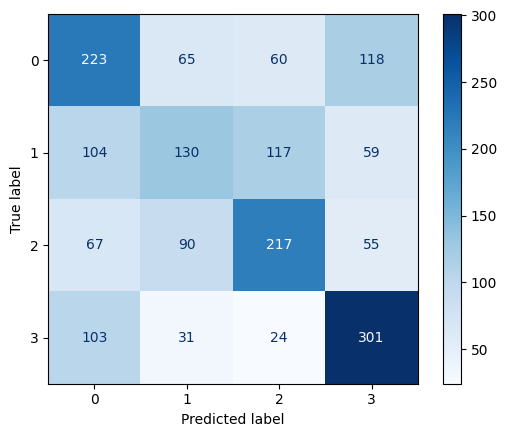

In [30]:
ConfusionMatrixDisplay.from_estimator(cv, X_test, y_test, cmap=plt.cm.Blues, normalize=None)

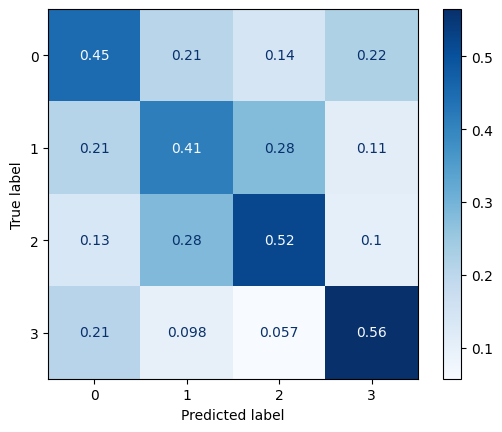

In [31]:
ConfusionMatrixDisplay.from_estimator(cv, X_test, y_test, cmap=plt.cm.Blues, normalize='pred')

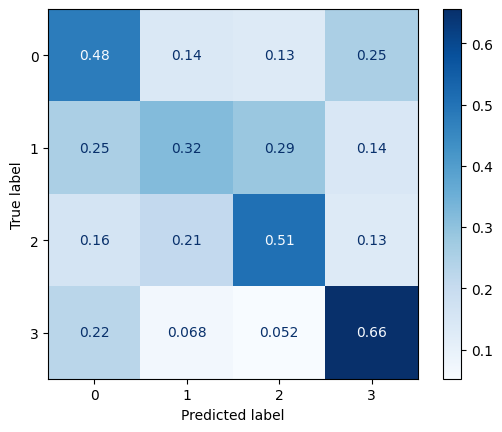

In [32]:
ConfusionMatrixDisplay.from_estimator(cv, X_test, y_test, cmap=plt.cm.Blues, normalize='true')